In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')

In [3]:
df.drop('day',axis=1,inplace=True)

In [4]:
df.drop('month',axis=1,inplace=True)

In [5]:
df.drop('year',axis=1,inplace=True)

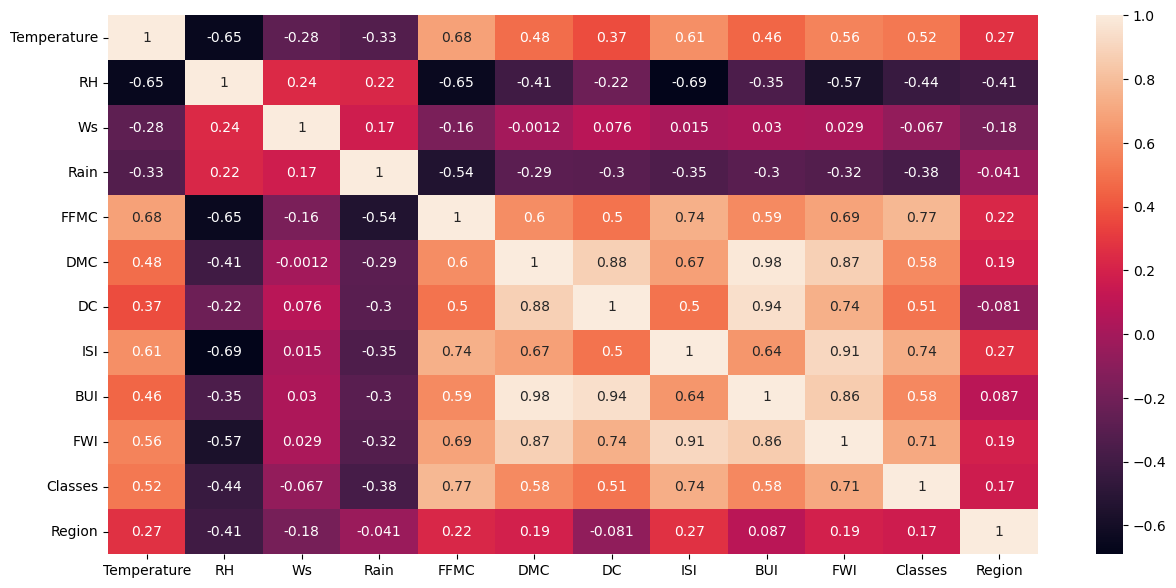

In [6]:
plt.figure(figsize=(15,7));
sns.heatmap(df.corr(),annot=True);

In [7]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [9]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.664492,-0.249312,-0.375047,0.703238,0.485379,0.374673,0.609525,0.458575,0.512818,0.256099
RH,-0.664492,1.000000,0.235766,0.262550,-0.637201,-0.398168,-0.215075,-0.694976,-0.344365,-0.429397,-0.397053
Ws,-0.249312,0.235766,1.000000,0.262759,-0.169489,-0.013533,0.073923,0.015384,0.022529,-0.078171,-0.229797
Rain,-0.375047,0.262550,0.262759,1.000000,-0.585018,-0.291338,-0.296114,-0.353219,-0.301347,-0.394262,-0.096985
FFMC,0.703238,-0.637201,-0.169489,-0.585018,1.000000,0.602278,0.508348,0.744270,0.592841,0.774398,0.237434
DMC,0.485379,-0.398168,-0.013533,-0.291338,0.602278,1.000000,0.877045,0.652894,0.981876,0.580530,0.197489
DC,0.374673,-0.215075,0.073923,-0.296114,0.508348,0.877045,1.000000,0.496563,0.941248,0.501279,-0.079217
ISI,0.609525,-0.694976,0.015384,-0.353219,0.744270,0.652894,0.496563,1.000000,0.624038,0.744568,0.267027
BUI,0.458575,-0.344365,0.022529,-0.301347,0.592841,0.981876,0.941248,0.624038,1.000000,0.583094,0.092548
Classes,0.512818,-0.429397,-0.078171,-0.394262,0.774398,0.580530,0.501279,0.744568,0.583094,1.000000,0.158763


In [10]:
def mul_col():
    col_name=set()
    for i in range(len(x_train.corr().columns)):
        for j in range(i):
            if abs(x_train.corr().iloc[i,j])>0.85:
                col_name.add(x_train.corr().columns[i])
    return col_name

In [11]:
l=list(mul_col())
l

['BUI', 'DC']

In [12]:
x_train.drop(l,axis=1,inplace=True)
x_test.drop(l,axis=1,inplace=True)


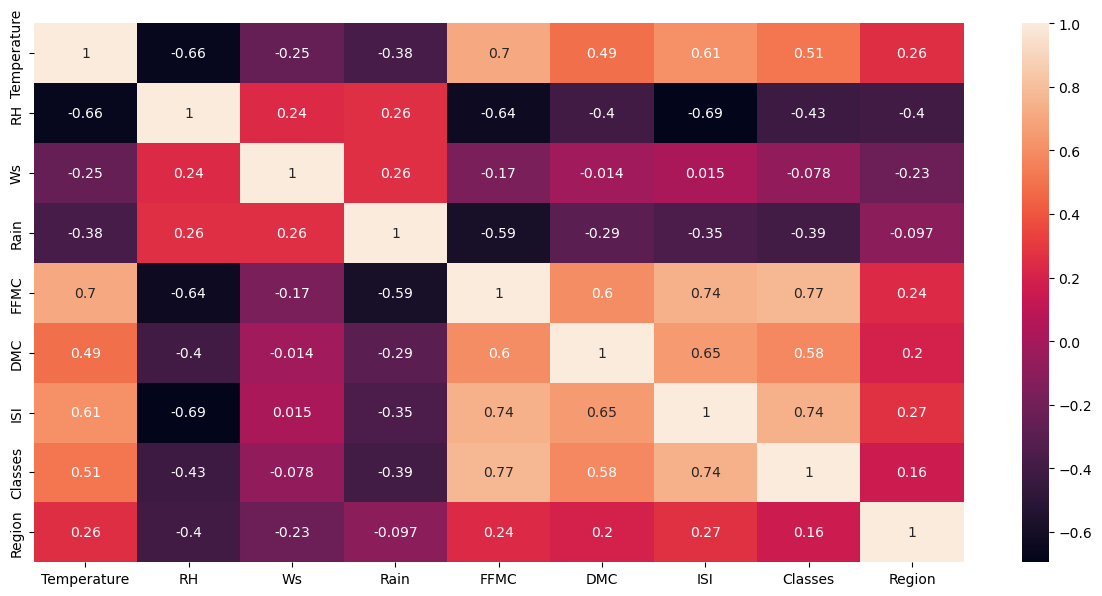

In [13]:
plt.figure(figsize=(15,7));
sns.heatmap(x_train.corr(),annot=True);

In [14]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

<AxesSubplot: >

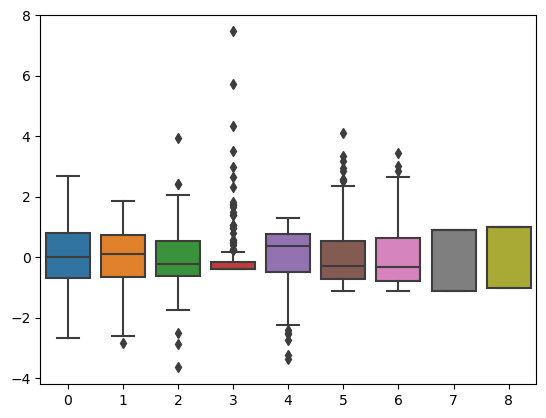

In [15]:
sns.boxplot(data=x_train)

In [16]:
regressor=LinearRegression()

In [17]:
regressor.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred=regressor.predict(x_test)

In [19]:
y_test

24      8.4
6       7.2
153     6.4
211     5.9
198    14.8
       ... 
172    30.0
242     0.7
152     0.5
231    15.4
155     9.9
Name: FWI, Length: 61, dtype: float64

In [20]:
r2_score(y_test,y_pred)

0.9870701853417397

In [21]:
mae=mean_absolute_error(y_test,y_pred)

In [22]:
mae

0.6622760981555541

In [25]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(x_train,y_train)
y_pred=lasso.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.2576039197583133
R2 Score 0.9470088305428066


In [26]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.6842379792714681
R2 Score 0.9863793087454633


In [27]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(x_train,y_train)
y_pred=elastic.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.9218545004750285
R2 Score 0.8725175392821604
